# COVID 19 data clean up and plotting

### Imported Dependencies - Created a path for csv files to be used in the notebook - Assigned a variable df to be used to read the CSV files

In [1]:
# import Dependencies
from pylab import figure, show, legend, ylabel
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Get datafile
allState_path = "../Covid_Data/all-states-history.csv"
usCovid_path = "../Covid_Data/national-history.csv"
conSent_path = "../Covid_Data/UMICH-SOC38.csv"
carSales_path = "../Car_sales_Data/Car sales by month.csv"

# Read the data and assign variable
allState_covid = pd.read_csv(allState_path)
usCovid_covid = pd.read_csv(usCovid_path)
consumer_sentiment = pd.read_csv(conSent_path)
car_sales = pd.read_csv(carSales_path)


### Display CSV files to Analyze - Reduce and Organize the number of Columns using: .loc and .sort. There were no NaN values in "positiveIncrease" column

In [2]:
# Display to Analyze and clean up dataframe for the US
usCovid_covid

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,2020-12-11,287058.0,2749,33237.0,21010.0,5444,108108.0,608998.0,168637806,1449905,3424.0,7489.0,15592946,232105,6135314.0,56,215110717,2094901
1,2020-12-10,284309.0,3115,32919.0,21023.0,4335,107276.0,603554.0,167187901,1339749,3394.0,7442.0,15360841,215669,5985047.0,56,213015816,1954686
2,2020-12-09,281194.0,3170,32720.0,20906.0,5424,106705.0,599219.0,165848152,1276606,3376.0,7624.0,15145172,211020,5891885.0,56,211061130,1822067
3,2020-12-08,278024.0,2697,32406.0,20483.0,4309,104623.0,593795.0,164571546,1192820,3359.0,7245.0,14934152,215335,5788509.0,56,209239063,1628432
4,2020-12-07,275327.0,1297,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,3328.0,7073.0,14718817,180219,5714557.0,56,207610631,1772911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,2020-01-26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
321,2020-01-25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
322,2020-01-24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
323,2020-01-23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [3]:
# Make a new data frame containing only two columns using df.loc[:] 
usCovid_df = usCovid_covid.loc[:,['date', 'positiveIncrease']]
usCovid_df

,date,positiveIncrease
0,2020-12-11,232105
1,2020-12-10,215669
2,2020-12-09,211020
3,2020-12-08,215335
4,2020-12-07,180219
...,...,...
320,2020-01-26,0
321,2020-01-25,0
322,2020-01-24,0
323,2020-01-23,0


In [4]:
# Sort data frame by date so that numbers of positive cases will be smaller on top
cov = usCovid_df.sort_values(by=['date'])
cov.head()

,date,positiveIncrease
324,2020-01-22,0
323,2020-01-23,0
322,2020-01-24,0
321,2020-01-25,0
320,2020-01-26,0


## Plot bar chart for daily count of new Covid cases and add 5 historical markers

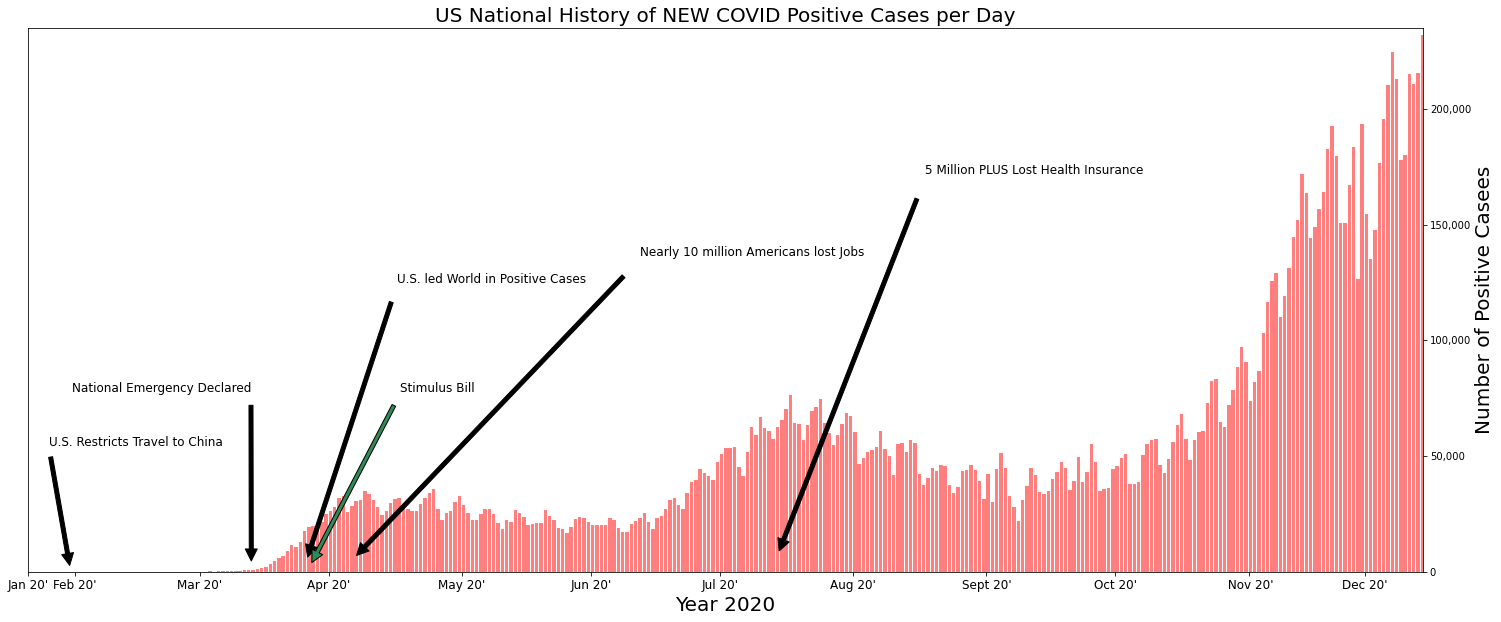

In [5]:
# Set x axis by the length of dataframe
x_axis = np.arange(len(usCovid_df))

# determine the size of the figure
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)

# Plot bar plot with the length as the dates
plt.bar(x_axis, cov['positiveIncrease'], color = 'r', alpha = 0.50,align = 'edge')

# y-axis on the right side to read left to right - progressively going up in date and covid count per day
ax.yaxis.tick_right()

#plt.xticks(tick_locations)
ax.set_xticks([0,11,40,70,101,131,161,192,223,253,284,311])
ax.set_xticklabels(["Jan 20'","Feb 20'", "Mar 20'", "Apr 20'", "May 20'", "Jun 20'",
                   "Jul 20'", "Aug 20'", "Sept 20'","Oct 20'", " Nov 20'", "Dec 20'"],fontsize = 12)
# plot limits
plt.xlim(0,324.5)
plt.ylim(-1,235000)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Labels
plt.title("US National History of NEW COVID Positive Cases per Day",fontsize = 20)
plt.xlabel('Year 2020',fontsize = 20)
#plt.ylabel("Number of Postive Cases")
ax.yaxis.set_label_position('right')
ax.set_ylabel('Number of Positive Casees', fontsize = 20)

#Historical Markers
ax.annotate('National Emergency Declared', xy=(52, 900),  xycoords='data',
            xytext=(.16, .350), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)        
ax.annotate('5 Million PLUS Lost Health Insurance', xy=(173, 500),  xycoords='data',
            xytext=(.8, .75), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('Nearly 10 million Americans lost Jobs', xy=(73, 300),  xycoords='data',
            xytext=(.6, .60), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('U.S. led World in Positive Cases', xy=(64, 200),  xycoords='data',
            xytext=(.4, .55), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('Stimulus Bill', xy=(65, 170),  xycoords='data',
            xytext=(.32, .35), textcoords='axes fraction',
            arrowprops=dict(facecolor='seagreen', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)
ax.annotate('U.S. Restricts Travel to China', xy=(10, 100),  xycoords='data',
            xytext=(.14, .25), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',fontsize = 12)

# Save image in directory COVID_data
plt.savefig('covid_us_barplot.png')

plt.show()

## Plot line chart for daily count of new Covid cases

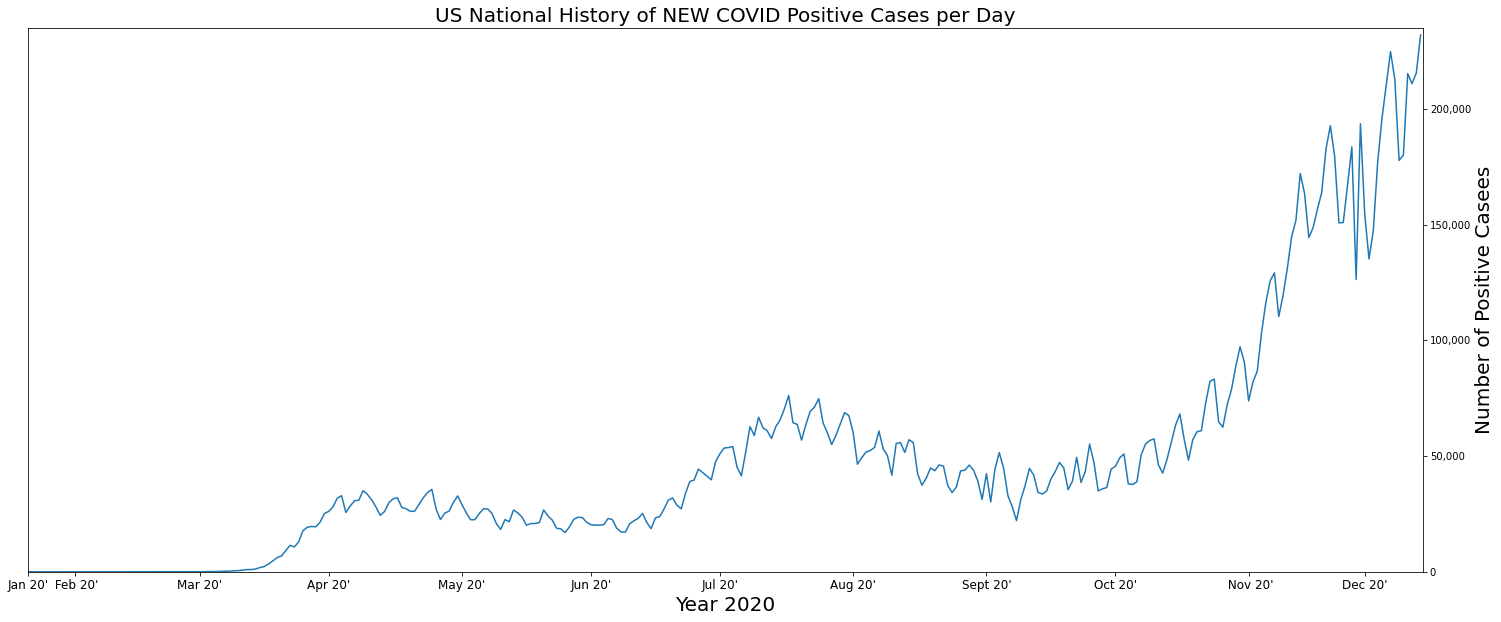

In [6]:
# Create a list indicating where to write x labels and set figure size to adjust for space
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)

# plot by positiveIncrease column
plt.plot(x_axis, cov['positiveIncrease'])

# Set ticks(tick_locations) for x axis
ax.set_xticks([0,11,40,70,101,131,161,192,223,253,284,311])
ax.set_xticklabels(["Jan 20'"," Feb 20'", "Mar 20'", "Apr 20'", "May 20'", "Jun 20'",
                   "Jul 20'", "Aug 20'", "Sept 20'","Oct 20'", " Nov 20'", "Dec 20'"],fontsize = 12)
# y-axis on the right side
ax.yaxis.tick_right()
plt.xlim(0,324.5)
plt.ylim(-1,235000)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("US National History of NEW COVID Positive Cases per Day",fontsize = 20)
plt.xlabel('Year 2020',fontsize = 20)
#plt.ylabel("Number of Postive Cases")
ax.yaxis.set_label_position('right')
ax.set_ylabel('Number of Positive Casees', fontsize = 20)

#Historical Markers
ax.set_ylabel('Number of Positive Casees', fontsize = 20)

# Save image in directory COVID_data
plt.savefig('covid_us_lineplot.png')
plt.show()

### Display CSV file for all-states-history.csv Data to Analyze - Reduce and Organize the number of Columns and Rows using: groupby, .loc(), .drop.(), and .reset_index().

In [7]:
# Display to Analyze and clean up dataframe for all states - column positiveIncrease did not display Nan values
allState_covid.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-11,AK,A,158.0,158.0,3,NaN,869.0,869.0,146.0,...,1123545.0,10185,NaN,NaN,NaN,NaN,NaN,0,1123545.0,10185
1,2020-12-11,AL,A,4086.0,3612.0,52,474.0,28146.0,28146.0,2111.0,...,1696439.0,12077,NaN,NaN,76958.0,NaN,1696439.0,12077,NaN,0
2,2020-12-11,AR,A+,2875.0,2588.0,55,287.0,9848.0,9848.0,1059.0,...,1828179.0,15181,NaN,21856.0,NaN,173190.0,NaN,0,1828179.0,15181
3,2020-12-11,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2020-12-11,AZ,A+,7245.0,6689.0,91,556.0,30302.0,30302.0,3482.0,...,4187860.0,51785,374754.0,NaN,NaN,NaN,2460821.0,23112,4187860.0,51785


In [8]:
# Display column names for clarification
allState_covid.columns

Index(['date', 'state', 'dataQualityGrade', 'death', 'deathConfirmed',
       'deathIncrease', 'deathProbable', 'hospitalized',
       'hospitalizedCumulative', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'inIcuCumulative', 'inIcuCurrently', 'negative',
       'negativeIncrease', 'negativeTestsAntibody',
       'negativeTestsPeopleAntibody', 'negativeTestsViral',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveCasesViral', 'positiveIncrease', 'positiveScore',
       'positiveTestsAntibody', 'positiveTestsAntigen',
       'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen',
       'positiveTestsViral', 'recovered', 'totalTestEncountersViral',
       'totalTestEncountersViralIncrease', 'totalTestResults',
       'totalTestResultsIncrease', 'totalTestsAntibody', 'totalTestsAntigen',
       'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'totalTestsPeopleViral', 'totalTestsPeopleViralIncrease',
       'totalTestsViral'

In [9]:
# Pick column state and positive increase to show # of cases per day that were reported as positive
allState_covid_df = allState_covid.loc[:,['state','positiveIncrease']]
allState_covid_df

,state,positiveIncrease
0,AK,622
1,AL,3853
2,AR,2770
3,AS,0
4,AZ,6983
...,...,...
15908,WA,0
15909,MA,0
15910,WA,0
15911,MA,0


In [10]:
# create dataframe out of grouped by state
state_df = allState_covid_df.groupby('state')

# get the total sum of cases for the year
sum_state = state_df['positiveIncrease'].sum()

# drop territories, keep states
state_drop = sum_state.drop(['GU','PR','VI','AS','MP'])

# reset index
sumCases_perState = state_drop.reset_index()

# Display to check
sumCases_perState

,state,positiveIncrease
0,AK,38584
1,AL,288775
2,AR,181624
3,AZ,394510
4,CA,1485650
5,CO,281671
6,CT,146761
7,DC,24357
8,DE,43818
9,FL,1087956


### Plot cleaned data for Covid History for each state - Show Total Sum Per State

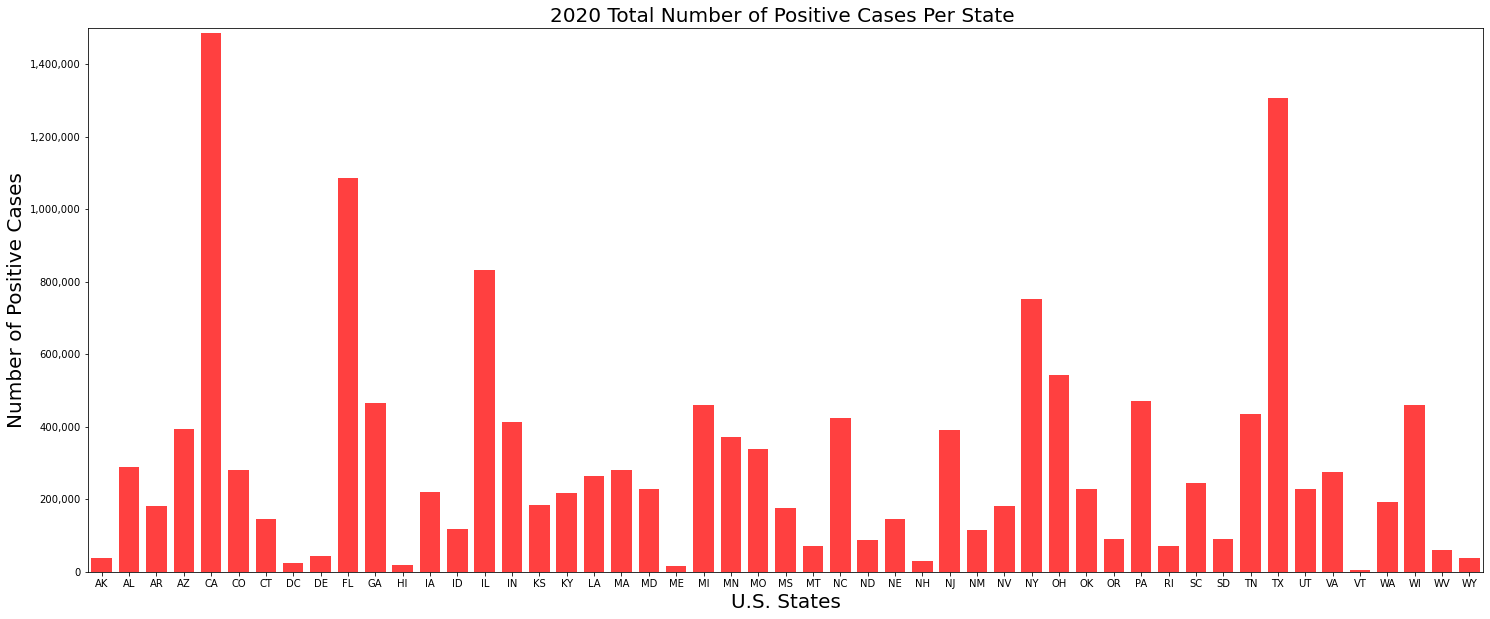

In [11]:
# Create a bar plot that shows total sum of positive covid cases per state

# fig size
f = plt.figure(figsize=(25,10))
ax = f.add_subplot(111)

# give a variable for x and y axis using dataframe and refer to column
x_axis = sumCases_perState['state']
y_axis = sumCases_perState['positiveIncrease']

# format numbers to avoid scientific notation
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# plot bar graph
plt.bar(x_axis,y_axis, align = 'center', width = .75, color = "red", alpha = 0.75)

# fit bars in graph 
plt.xlim(-0.5,len(x_axis)-.5)
plt.ylim(0, 1500000)

# Labels
plt.ylabel('Number of Positive Cases',fontsize = 20)
plt.title("2020 Total Number of Positive Cases Per State " ,fontsize = 20)
plt.xlabel('U.S. States',fontsize = 20)

# save to file
plt.savefig('covid_st_barplot.png')

plt.show()

### Analyzed and Clean data for Consumer Sentiment - picked essential columns. Used .loc, .rename, created a boolean

In [12]:
# Display consumer_sentiment dataframe
consumer_sentiment

,Date,Good Time<br>Prices are Low,Good Time<br>Prices will increase,Good Time<br>Interest rates low,Good Time<br>Rising interest rates,Good Time<br>Times good,Good Time<br>Fuel Efficiency,Bad Time<br>Prices High,Bad Time<br>Interest rates high,Bad Time<br>Can't Afford,Bad Time<br>Uncertain Future,Bad Time<br>Gas Prices,Bad Time<br>Poor Selection,Relative: prices,Relative: rates
0,2020-10-31,35.0,1.0,24.0,0.0,7.0,0.0,12.0,4.0,14.0,13.0,0.0,1.0,23.0,20.0
1,2020-09-30,37.0,3.0,25.0,0.0,7.0,1.0,11.0,2.0,10.0,14.0,0.0,1.0,26.0,23.0
2,2020-08-31,40.0,1.0,25.0,0.0,5.0,0.0,10.0,5.0,12.0,18.0,0.0,2.0,30.0,20.0
3,2020-07-31,43.0,1.0,22.0,0.0,4.0,0.0,10.0,6.0,12.0,18.0,0.0,1.0,33.0,16.0
4,2020-06-30,49.0,2.0,28.0,0.0,4.0,0.0,6.0,4.0,10.0,15.0,0.0,1.0,43.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,1978-06-30,7.0,39.0,1.0,1.0,4.0,3.0,24.0,4.0,1.0,1.0,1.0,11.0,-17.0,-3.0
509,1978-05-31,6.0,33.0,1.0,1.0,3.0,3.0,23.0,3.0,2.0,0.0,1.0,8.0,-17.0,-2.0
510,1978-04-30,7.0,36.0,1.0,1.0,3.0,3.0,22.0,2.0,3.0,0.0,2.0,10.0,-15.0,-1.0
511,1978-03-31,12.0,34.0,0.0,2.0,2.0,3.0,20.0,2.0,4.0,1.0,1.0,8.0,-8.0,-2.0


In [13]:
# Creating a dataframe for consumer sentiment with .loc and renaming columns
consumer_sentiment_df = consumer_sentiment.loc[:,['Date', "Good Time<br>Times good","Good Time<br>Interest rates low"]]
consumer_sentiment_df.rename(columns = {"Good Time<br>Times good":"Good Times","Good Time<br>Interest rates low":
                                       "Good Time-Interest rates low"}, inplace = True) 
consumer_sentiment_df

,Date,Good Times,Good Time-Interest rates low
0,2020-10-31,7.0,24.0
1,2020-09-30,7.0,25.0
2,2020-08-31,5.0,25.0
3,2020-07-31,4.0,22.0
4,2020-06-30,4.0,28.0
...,...,...,...
508,1978-06-30,4.0,1.0
509,1978-05-31,3.0,1.0
510,1978-04-30,3.0,1.0
511,1978-03-31,2.0,0.0


In [14]:
# Check type for each column
consumer_sentiment_df.dtypes

Date                             object
Good Times                      float64
Good Time-Interest rates low    float64
dtype: object

In [15]:
# state variables for date range to be analyzed
start_date = '2019-12-31'
end_date = '2020-10-31'

# make a variable boolean to find only those rows that meet the conditions
mask = (consumer_sentiment_df['Date'] > start_date) & (consumer_sentiment_df['Date'] <= end_date)

In [16]:
# Creating a dataframe for just the available data for the start date to end dates data of 2020 published by UMICH
Con_Sum_df = consumer_sentiment_df.loc[mask]
#Con_Sum_df

In [17]:
# put the data frame in order
Con_Sum_df = pd.DataFrame([["2020-01-01", 18.0,18.0], ["2020-02-01", 18,19], ["2020-03-01", 14.0,22.0], ["2020-04-01",5.0,19.0],
                      ["2020-05-01", 3.0,25.0], ["2020-06-01", 4.0,28.0], ["2020-07-01", 4.0,22.0], ["2020-08-01",5.0,25.0],
                      ['2020-09-01',7.0,25.0], ['2020-10-01',7.0,24.0]], 
                   columns=["Date", "Good Times", "Good Times-Interest rates low"])

Con_Sum_df

,Date,Good Times,Good Times-Interest rates low
0,2020-01-01,18.0,18.0
1,2020-02-01,18.0,19.0
2,2020-03-01,14.0,22.0
3,2020-04-01,5.0,19.0
4,2020-05-01,3.0,25.0
5,2020-06-01,4.0,28.0
6,2020-07-01,4.0,22.0
7,2020-08-01,5.0,25.0
8,2020-09-01,7.0,25.0
9,2020-10-01,7.0,24.0


In [18]:
# Check data types per column
Con_Sum_df.dtypes

Date                              object
Good Times                       float64
Good Times-Interest rates low    float64
dtype: object

### Set up the Covid Clean data for the US ready to merge with consumer data - used .groupby, .strftime, .sort, .DataFrame, .rename

In [19]:
# Group by month positive cases per day
cov_month = cov.groupby(cov['date'])['positiveIncrease'].sum().sort_values()
cov_month_df= cov_month.reset_index()
cov_month_df

,date,positiveIncrease
0,2020-01-22,0
1,2020-02-12,0
2,2020-02-13,0
3,2020-02-14,0
4,2020-02-15,0
...,...,...
320,2020-12-05,212940
321,2020-12-08,215335
322,2020-12-10,215669
323,2020-12-04,224878


In [20]:
cov_month_df.dtypes

date                object
positiveIncrease     int64
dtype: object

In [21]:
# Change Name dates to numbers - so that there could be a common column in each df and can be merged later on 
cov_month_df = pd.DataFrame([["2020-01-01", 0], ["2020-02-01", 18], ["2020-03-01", 197906], ["2020-04-01", 875821],
                      ["2020-05-01", 717464], ["2020-06-01", 832778], ["2020-07-01", 1898074], ["2020-08-01",1452932],
                      ['2020-09-01',1190447], ['2020-10-01',1883549], ['2020-11-01',4291045],
                      ["2020-12-01",2252912]], 
                   columns=["date", "positiveIncrease"])

#Renamed columns
cov_month_df = cov_month_df.rename(columns={"date":"Date","positiveIncrease":"Positive Per Month"})

cov_month_df

,Date,Positive Per Month
0,2020-01-01,0
1,2020-02-01,18
2,2020-03-01,197906
3,2020-04-01,875821
4,2020-05-01,717464
5,2020-06-01,832778
6,2020-07-01,1898074
7,2020-08-01,1452932
8,2020-09-01,1190447
9,2020-10-01,1883549


### Merge Clean Data sets for Consumer Sentiment and COVID positive increase per month - used .merge

In [22]:
# Created merged dataframe - merged with the column "Date"
casesVsentiment = pd.merge(Con_Sum_df,cov_month_df)
casesVsentiment

,Date,Good Times,Good Times-Interest rates low,Positive Per Month
0,2020-01-01,18.0,18.0,0
1,2020-02-01,18.0,19.0,18
2,2020-03-01,14.0,22.0,197906
3,2020-04-01,5.0,19.0,875821
4,2020-05-01,3.0,25.0,717464
5,2020-06-01,4.0,28.0,832778
6,2020-07-01,4.0,22.0,1898074
7,2020-08-01,5.0,25.0,1452932
8,2020-09-01,7.0,25.0,1190447
9,2020-10-01,7.0,24.0,1883549


In [23]:
# checked for types per column
casesVsentiment.dtypes

Date                              object
Good Times                       float64
Good Times-Interest rates low    float64
Positive Per Month                 int64
dtype: object

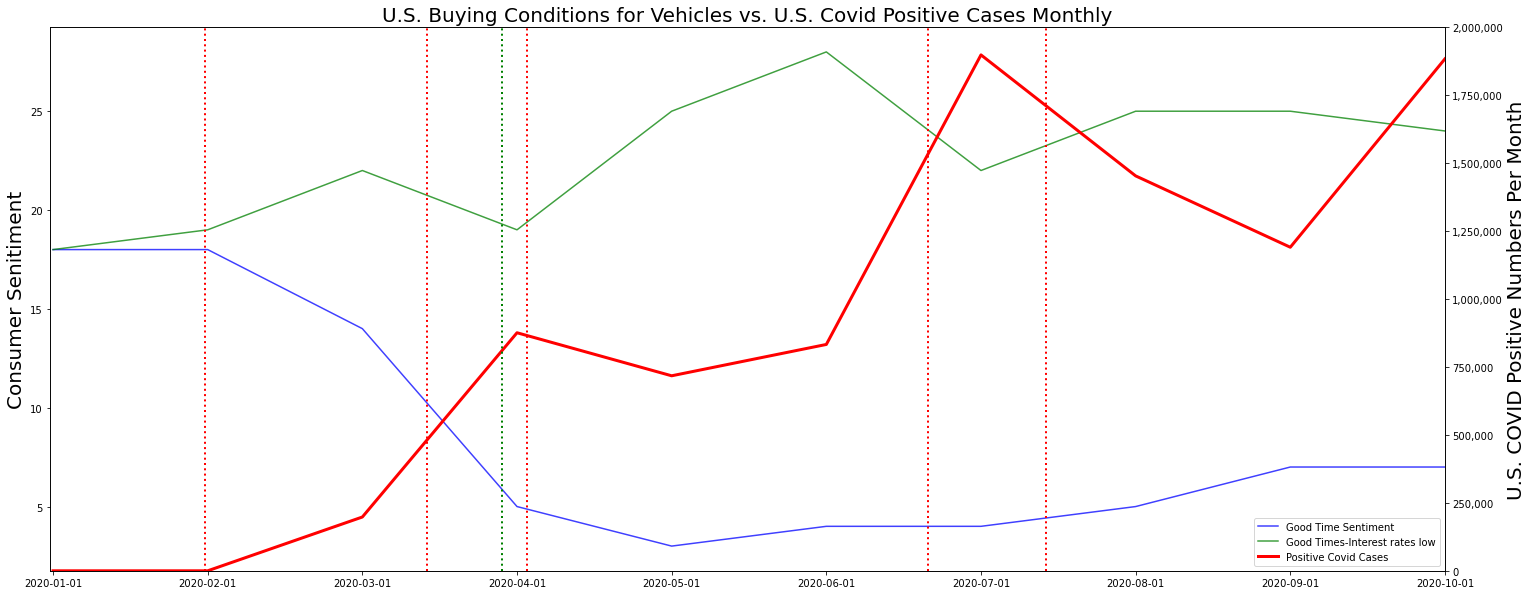

In [24]:
# Added dependency for plot - aesthetics
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.pyplot import figure

# Added variables for three line plots
x_axis = casesVsentiment['Date']
x_axis1 = casesVsentiment['Date']
x_axis2 = casesVsentiment['Date']
y_axis = casesVsentiment["Good Times"]
y_axis1 = casesVsentiment["Good Times-Interest rates low"]
y_axis2 = casesVsentiment["Positive Per Month"]

# fig size
f=plt.figure(figsize=(25,10))
ax = f.add_subplot(111)

# line plots - line plots with handles
line1, = ax.plot(x_axis,y_axis,c='blue',alpha = 0.75, label = "Good Time Sentiment")
line2, = plt.plot(x_axis1,y_axis1,c='green',alpha = 0.75, label = "Good Times-Interest rates low")

# Label y axis left for line 1 and line 2
plt.ylabel('Consumer Senitiment',fontsize = 20)

# switch line 3 y axis label to the right...it shares the same x axis as line 1 but on the right side
ax2 = ax.twinx()
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# line 3 plot
line3, = ax2.plot(x_axis2,y_axis2,c='red',lw=3, label = "Positive Covid Cases")

#label for right side 
ax2.set_ylabel('U.S. COVID Positive Numbers Per Month', fontsize = 20)

# plot legend
first_legend = plt.legend(handles=[line1,line2,line3], loc='lower right')

# Set limits for plot
plt.xlim(-.02,len(x_axis)-1)
plt.ylim(0, 2000000)

# plot title
plt.title("U.S. Buying Conditions for Vehicles vs. U.S. Covid Positive Cases Monthly" ,fontsize = 20)

# Add historical lines - x coordinates for the lines
xcoords = [.9838,2.4193, 2.9,3.066,6.4193,5.66]
# colors for the lines
colors = ['r','r','g','r','r','r']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, lw=2, ls='dotted')
    
plt.savefig('buying_conditions_cars.png')
plt.show()

### Clean up and Analyze data for midrange car sales and consumer sentiment vs. COVID-19 cases per month - using, .loc, .rename, .drop(index), .astype(str), .astype(float), .groupby, .sum(), .T, .merge

In [25]:
## Display Car Sales 
#car_sales.head()
car_sales.rename( columns={'Unnamed: 1':'car_class','Unnamed: 0': 'car brands'}, inplace=True )
car_sales.head()

,car brands,car_class,2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,...,2019.11,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8
0,NaN,NaN,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Dec,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep
1,Acura,Mid-Range,9764,12213,14408,11687,13547,12148,12759,15189,...,16133,9230,12264,7037,5046,10341,12071,13076,13647,12941
2,Alfa Romeo,Luxury,1150,1362,1774,1584,1572,1595,1418,1588,...,1629,1202,1557,943,672,1494,1569,1773,1576,1707
3,Audi,Luxury,14253,13560,20302,15024,18892,19409,19370,21531,...,25850,13438,17396,10537,6270,13935,14634,16795,14928,16173
4,BMW,Luxury,18102,23558,32228,23816,27108,31627,23015,25505,...,35746,22009,25002,15141,9171,20382,21403,24351,21565,22523


In [26]:
# find columns to keep and rename to create df
car_sales = car_sales.loc[:,['car_class', '2020','2020.1','2020.2','2020.3','2020.4','2020.5','2020.6','2020.7','2020.8']]
car_sales = car_sales.rename(columns = {'2020':'2020-02-01','2020.1': '2020-03-01','2020.2':'2020-04-01','2020.3':'2020-05-01',
                                         '2020.4':'2020-06-01','2020.5':'2020-07-01','2020.6':'2020-08-01','2020.7':'2020-09-01',
                                         '2020.8':'2020-10-01'})
car_sales.head()

,car_class,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01
0,NaN,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep
1,Mid-Range,9230,12264,7037,5046,10341,12071,13076,13647,12941
2,Luxury,1202,1557,943,672,1494,1569,1773,1576,1707
3,Luxury,13438,17396,10537,6270,13935,14634,16795,14928,16173
4,Luxury,22009,25002,15141,9171,20382,21403,24351,21565,22523


In [27]:
# Drop row index 0
car_sales = car_sales.drop(index = [0])
car_sales.head()

,car_class,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01
1,Mid-Range,9230,12264,7037,5046,10341,12071,13076,13647,12941
2,Luxury,1202,1557,943,672,1494,1569,1773,1576,1707
3,Luxury,13438,17396,10537,6270,13935,14634,16795,14928,16173
4,Luxury,22009,25002,15141,9171,20382,21403,24351,21565,22523
5,Mid-Range,11001,14242,8627,6395,14207,14919,17238,15333,16599


In [29]:
# Convert df to float by column
car_sales['2020-02-01'] = car_sales['2020-02-01'].astype(str).astype(float)
car_sales['2020-03-01'] = car_sales['2020-03-01'].astype(str).astype(float)
car_sales['2020-04-01'] = car_sales['2020-04-01'].astype(str).astype(float)
car_sales['2020-05-01'] = car_sales['2020-05-01'].astype(str).astype(float)
car_sales['2020-06-01'] = car_sales['2020-06-01'].astype(str).astype(float)
car_sales['2020-07-01'] = car_sales['2020-07-01'].astype(str).astype(float)
car_sales['2020-08-01'] = car_sales['2020-08-01'].astype(str).astype(float)
car_sales['2020-09-01'] = car_sales['2020-09-01'].astype(str).astype(float)
car_sales['2020-10-01'] = car_sales['2020-10-01'].astype(str).astype(float)

# Check column types
print(car_sales.dtypes)

car_class      object
2020-02-01    float64
2020-03-01    float64
2020-04-01    float64
2020-05-01    float64
2020-06-01    float64
2020-07-01    float64
2020-08-01    float64
2020-09-01    float64
2020-10-01    float64
dtype: object


In [30]:
#Check dataframe
car_sales.head()

,car_class,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01
1,Mid-Range,9230.0,12264.0,7037.0,5046.0,10341.0,12071.0,13076.0,13647.0,12941.0
2,Luxury,1202.0,1557.0,943.0,672.0,1494.0,1569.0,1773.0,1576.0,1707.0
3,Luxury,13438.0,17396.0,10537.0,6270.0,13935.0,14634.0,16795.0,14928.0,16173.0
4,Luxury,22009.0,25002.0,15141.0,9171.0,20382.0,21403.0,24351.0,21565.0,22523.0
5,Mid-Range,11001.0,14242.0,8627.0,6395.0,14207.0,14919.0,17238.0,15333.0,16599.0


In [31]:
# Use Groupby to group by car class, sum, and then reset index
carClass_grouped = car_sales.groupby(['car_class'])
carClass_df = carClass_grouped.sum()
carClass_df.reset_index()

,car_class,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01
0,Economy,399686.0,502768.0,324652.0,216139.0,426152.0,420175.0,453122.0,456184.0,475062.0
1,Luxury,139147.0,159345.0,101670.0,60015.0,134840.0,142190.0,184278.0,171978.0,179562.0
2,Mid-Range,614686.0,767570.0,483423.0,284773.0,615887.0,647220.0,693415.0,665481.0,710369.0
3,Ultra Luxury,3896.0,5033.0,3055.0,2195.0,4877.0,5121.0,5452.0,4846.0,5250.0


In [32]:
# Use transpose to make rows into columns
carClass = carClass_df.T
carClass

car_class,Economy,Luxury,Mid-Range,Ultra Luxury
2020-02-01,399686.0,139147.0,614686.0,3896.0
2020-03-01,502768.0,159345.0,767570.0,5033.0
2020-04-01,324652.0,101670.0,483423.0,3055.0
2020-05-01,216139.0,60015.0,284773.0,2195.0
2020-06-01,426152.0,134840.0,615887.0,4877.0
2020-07-01,420175.0,142190.0,647220.0,5121.0
2020-08-01,453122.0,184278.0,693415.0,5452.0
2020-09-01,456184.0,171978.0,665481.0,4846.0
2020-10-01,475062.0,179562.0,710369.0,5250.0


In [33]:
# reset index
carClass.reset_index(level=0, inplace=True)
carClass

car_class,index,Economy,Luxury,Mid-Range,Ultra Luxury
0,2020-02-01,399686.0,139147.0,614686.0,3896.0
1,2020-03-01,502768.0,159345.0,767570.0,5033.0
2,2020-04-01,324652.0,101670.0,483423.0,3055.0
3,2020-05-01,216139.0,60015.0,284773.0,2195.0
4,2020-06-01,426152.0,134840.0,615887.0,4877.0
5,2020-07-01,420175.0,142190.0,647220.0,5121.0
6,2020-08-01,453122.0,184278.0,693415.0,5452.0
7,2020-09-01,456184.0,171978.0,665481.0,4846.0
8,2020-10-01,475062.0,179562.0,710369.0,5250.0


In [34]:
# Choose columns for new df
midrange_carSales = carClass.loc[:,['index',"Mid-Range"]]
midrange_carSales.columns.name = None

In [35]:
# rename columns
midrange_carSales.columns=['Date','Mid-Range Car Sales']
midrange_carSales

,Date,Mid-Range Car Sales
0,2020-02-01,614686.0
1,2020-03-01,767570.0
2,2020-04-01,483423.0
3,2020-05-01,284773.0
4,2020-06-01,615887.0
5,2020-07-01,647220.0
6,2020-08-01,693415.0
7,2020-09-01,665481.0
8,2020-10-01,710369.0


In [36]:
# Add a row to prepare to merge
midrange_carSales.loc[len(midrange_carSales.index)] = ['2020-01-01', 0]
# sort by date
midrange_carSales_sort = midrange_carSales.sort_values(by = ["Date"])

midrange_carSales_sort

,Date,Mid-Range Car Sales
9,2020-01-01,0.0
0,2020-02-01,614686.0
1,2020-03-01,767570.0
2,2020-04-01,483423.0
3,2020-05-01,284773.0
4,2020-06-01,615887.0
5,2020-07-01,647220.0
6,2020-08-01,693415.0
7,2020-09-01,665481.0
8,2020-10-01,710369.0


In [37]:
# Merge columns by date and outer
casesVcars_sent = pd.merge(midrange_carSales_sort,casesVsentiment, on='Date', how='outer')
casesVcars_sent

,Date,Mid-Range Car Sales,Good Times,Good Times-Interest rates low,Positive Per Month
0,2020-01-01,0.0,18.0,18.0,0
1,2020-02-01,614686.0,18.0,19.0,18
2,2020-03-01,767570.0,14.0,22.0,197906
3,2020-04-01,483423.0,5.0,19.0,875821
4,2020-05-01,284773.0,3.0,25.0,717464
5,2020-06-01,615887.0,4.0,28.0,832778
6,2020-07-01,647220.0,4.0,22.0,1898074
7,2020-08-01,693415.0,5.0,25.0,1452932
8,2020-09-01,665481.0,7.0,25.0,1190447
9,2020-10-01,710369.0,7.0,24.0,1883549


In [38]:
# Drop row index 0
casesVcars_sent=casesVcars_sent.drop(casesVcars_sent.index[0])

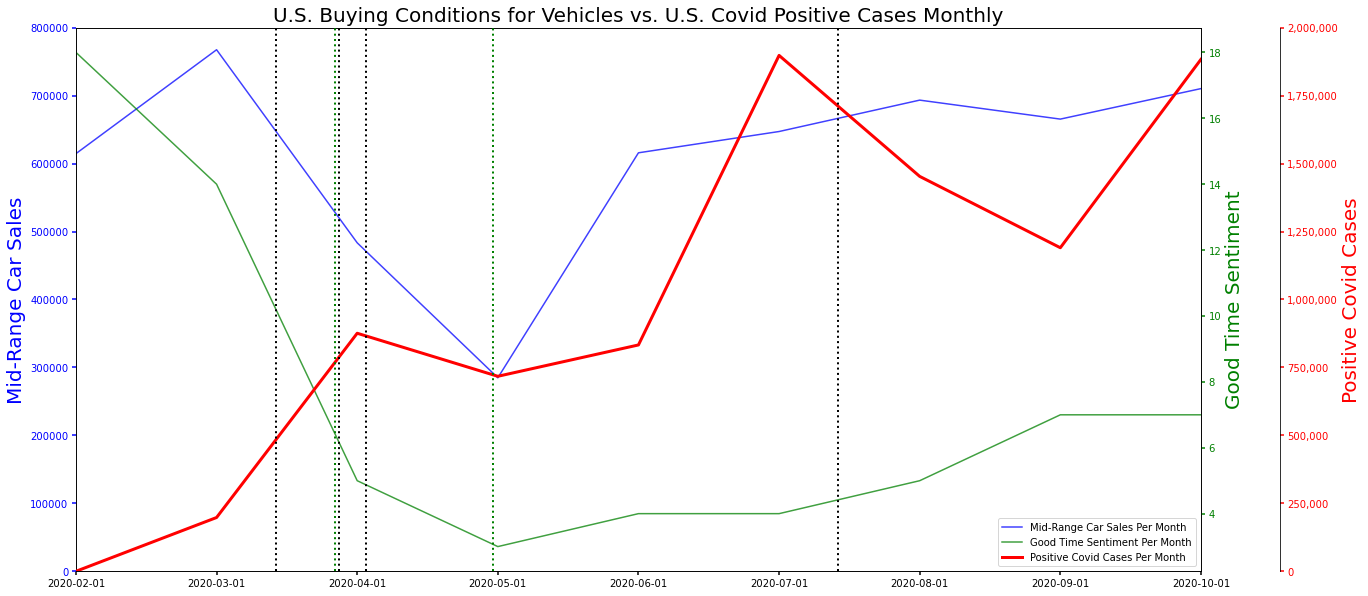

In [46]:
# Plot three line plot - NOTE: PLEASE RUN individual cell after RESTART & RUN ALL for PLOT output!!!

# Set spine for 2nd line plot
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

# give host plot a variable        
fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

#initiate share of x axis
par1 = host.twinx()
par2 = host.twinx()

# set position or spine
par2.spines["right"].set_position(("axes", 1.07))

make_patch_spines_invisible(par2)

par2.spines["right"].set_visible(True)

# set plot size
plt.rcParams["figure.figsize"] = (25, 10)

# Added variables for three line plots
x_axis = casesVcars_sent['Date']
x_axis1 = casesVcars_sent['Date']
x_axis2 = casesVcars_sent['Date']
y_axis = casesVcars_sent["Mid-Range Car Sales"]
y_axis1 = casesVcars_sent["Good Times"]
y_axis2 = casesVcars_sent["Positive Per Month"]


# line plots - line plots with handles
line1, = host.plot(x_axis,y_axis,c='blue',alpha = 0.75, label = "Mid-Range Car Sales Per Month")
line2, = par1.plot(x_axis1,y_axis1,c='green',alpha = 0.75, label = "Good Time Sentiment Per Month")
line3, = par2.plot(x_axis2,y_axis2,c='red',lw=3, label = "Positive Covid Cases Per Month")

# Give x and y limits to plots
host.set_xlim(0, 8)
host.set_ylim(0, 800000)
#par1.set_ylim(0, 4)
par2.set_ylim(0, 2000000)

# create labels 
host.set_xlabel("")
host.set_ylabel("Mid-Range Car Sales", fontsize = 20)
host.set_title("U.S. Buying Conditions for Vehicles vs. U.S. Covid Positive Cases Monthly" ,fontsize = 20)
par1.set_ylabel("Good Time Sentiment",fontsize = 20)
par2.set_ylabel("Positive Covid Cases",fontsize = 20)

# Give colors to labels
host.yaxis.label.set_color(line1.get_color())
par1.yaxis.label.set_color(line2.get_color())
par2.yaxis.label.set_color(line3.get_color())

# Use formatter to getting rid of scientific notation
par2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Give colors to ticks and lines
tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=line1.get_color(), **tkw)
par1.tick_params(axis='y', colors=line2.get_color(), **tkw)
par2.tick_params(axis='y', colors=line3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

# Variable for lines for legend 
lines = [line1, line2, line3]
host.legend(lines, [l.get_label() for l in lines], loc='lower right')

# Add historical lines - x coordinates for the lines
xcoords = [1.4193, 1.8387,1.8709,2.066,2.966,5.4193]
# colors for the lines
colors = ['k','g','k','k','g','k']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, lw=2, ls='dotted')
    
# Save figure in Covid Data
plt.savefig('buying_conditionsVehicles.png')

plt.show()